In [65]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [66]:
# Load in csv
ep_df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/MER_T01_02.csv")
# print(monthly_energy_production_df)
ep_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [67]:
# Convert date to string
ep_df["YYYYMM"] = ep_df["YYYYMM"].astype(str)
ep_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [84]:
data_types = ep_df.dtypes
print(data_types)

MSN             object
YYYYMM          object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object


In [109]:
# filter to contain only MM = 13 values
annual_sum_ep_df = ep_df[ep_df['YYYYMM'].str[-2:] == "13"]
annual_sum_ep_df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLPRBUS,194913,11.973882,1,Coal Production,Quadrillion Btu
1,CLPRBUS,195013,14.060135,1,Coal Production,Quadrillion Btu
2,CLPRBUS,195113,14.419325,1,Coal Production,Quadrillion Btu
3,CLPRBUS,195213,12.734313,1,Coal Production,Quadrillion Btu
4,CLPRBUS,195313,12.277746,1,Coal Production,Quadrillion Btu


In [110]:
#Reformat date

# Create a copy of the original DataFrame
filtered_annual_ep_df = annual_sum_ep_df.copy()

# Reformat date
filtered_annual_ep_df['Year'] = annual_sum_ep_df['YYYYMM'].str[:4]

# Drop the 'YYYYMM' column
filtered_annual_ep_df = filtered_annual_ep_df.drop(columns=['YYYYMM'])

# Display the modified DataFrame
filtered_annual_ep_df.head()









,MSN,Value,Column_Order,Description,Unit,Year
0,CLPRBUS,11.973882,1,Coal Production,Quadrillion Btu,1949
1,CLPRBUS,14.060135,1,Coal Production,Quadrillion Btu,1950
2,CLPRBUS,14.419325,1,Coal Production,Quadrillion Btu,1951
3,CLPRBUS,12.734313,1,Coal Production,Quadrillion Btu,1952
4,CLPRBUS,12.277746,1,Coal Production,Quadrillion Btu,1953


In [111]:
#View entries in Description
unique_descriptions = filtered_annual_ep_df["Description"].unique()
print(unique_descriptions)


['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production' 'Total Fossil Fuels Production'
 'Nuclear Electric Power Production' 'Hydroelectric Power Production'
 'Geothermal Energy Production' 'Solar Energy Production'
 'Wind Energy Production' 'Biomass Energy Production'
 'Total Renewable Energy Production' 'Total Primary Energy Production']


In [71]:
#Remove entries we do not want
primary_description_annual_ep_df = filtered_annual_ep_df[filtered_annual_ep_df["Description"].isin(['Coal Production', 'Natural Gas (Dry) Production', 'Crude Oil Production' , 'Natural Gas Plant Liquids Production', 'Nuclear Electric Power Production','Total Renewable Energy Production'])]


In [72]:
#View entries in Description
unique_descriptions = primary_description_annual_ep_df["Description"].unique()
print(unique_descriptions)

['Coal Production' 'Natural Gas (Dry) Production' 'Crude Oil Production'
 'Natural Gas Plant Liquids Production'
 'Nuclear Electric Power Production' 'Total Renewable Energy Production']


In [73]:
#Group data on unique Descriptions
# grouped = annual_energy_production_filtered_df.groupby("Description")


In [74]:
renewable_energy_df = primary_description_annual_ep_df[primary_description_annual_ep_df["Description"] == 'Total Renewable Energy Production']
renewable_energy_df.tail(5)

,MSN,Value,Column_Order,Description,Unit,Year
8134,REPRBUS,7.744195,12,Total Renewable Energy Production,Quadrillion Btu,2018
8147,REPRBUS,7.752818,12,Total Renewable Energy Production,Quadrillion Btu,2019
8160,REPRBUS,7.465203,12,Total Renewable Energy Production,Quadrillion Btu,2020
8173,REPRBUS,7.8073,12,Total Renewable Energy Production,Quadrillion Btu,2021
8186,REPRBUS,8.307341,12,Total Renewable Energy Production,Quadrillion Btu,2022


In [75]:
renewable_energy_df.set_index('Year', inplace=True)

In [76]:
renewable_energy_df.head(5)

,MSN,Value,Column_Order,Description,Unit
Year,,,,,
1949,REPRBUS,1.872627,12,Total Renewable Energy Production,Quadrillion Btu
1950,REPRBUS,1.906525,12,Total Renewable Energy Production,Quadrillion Btu
1951,REPRBUS,1.8908,12,Total Renewable Energy Production,Quadrillion Btu
1952,REPRBUS,1.848694,12,Total Renewable Energy Production,Quadrillion Btu
1953,REPRBUS,1.792616,12,Total Renewable Energy Production,Quadrillion Btu


In [77]:
column_headers = renewable_energy_df.columns
print(column_headers)

Index(['MSN', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')


In [78]:
# columns_to_remove = ['MSN','Column_Order', 'Description', 'Unit']
# renewable_energy_df.drop(columns=columns_to_remove, inplace=True)

# Assuming your DataFrame is named df
columns_to_remove = ['MSN','Column_Order', 'Description', 'Unit']
renewable_energy_df = renewable_energy_df.drop(columns=columns_to_remove)




In [79]:
renewable_energy_df.head()

,Value
Year,
1949,1.872627
1950,1.906525
1951,1.8908
1952,1.848694
1953,1.792616


In [102]:
data_types = renewable_energy_df.dtypes
print(data_types)

Value    float64
dtype: object


In [80]:
# Assuming 'your_column' is the name of the column you want to convert to numeric
renewable_energy_df['Value'] = pd.to_numeric(renewable_energy_df['Value'], errors='coerce')


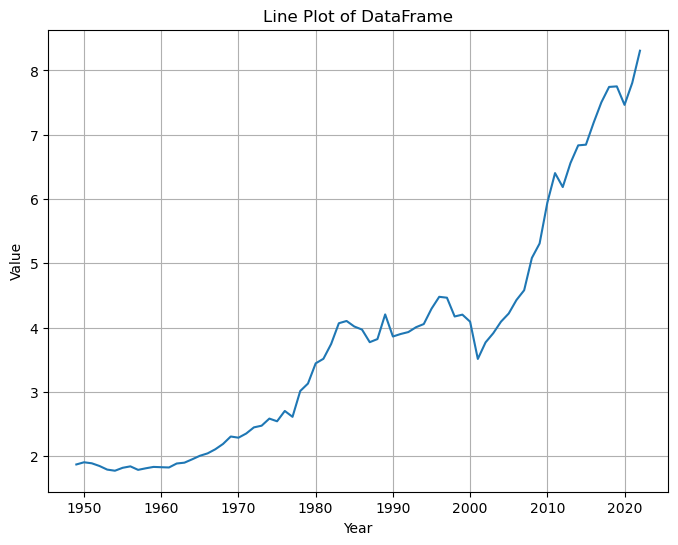

In [113]:
# # Extract data from the DataFrame
# x = renewable_energy_df.index
# y = renewable_energy_df['Value']

# # Create a scatter plot
# plt.plot(x, y, label='renewable_energy', color='blue', linestyle='-')

# # Add labels and a title
# plt.xlabel('Year')
# plt.ylabel('Value')
# plt.title('Scatter Plot of Year vs. Value')

# # # # Set x-axis ticks every 10 years
# years = range(min(x), max(x) + 1, 10)
# plt.xticks(years)

# # Show the plot
# plt.legend()
# plt.show()

# Assuming you have a DataFrame named df with 'Value' as the data column
# and the index as the default integer index

# Plot the data
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Assuming 'Value' is your data column
plt.plot(renewable_energy_df.index, renewable_energy_df['Value'], linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Plot of DataFrame')

# Set the x-axis ticks to specific years
years = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
plt.xticks(years)

# Show the plot
plt.grid()  # Optional: Add grid lines
plt.show()




